In [1]:
!pip install scikit-learn-extra

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import pickle

In [3]:
# Surpress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
pd.DataFrame.iteritems = pd.DataFrame.items

In [5]:
# Retrieve dataset and read first 5 rows
macroNutrient_LInterpolation =pd.read_csv(r"../Dataset/Dataset_for_EDA/macroNutrient_LInterpolation.csv", encoding= 'unicode_escape')
macroNutrient_LInterpolation

No.                                        Description       Category  \
0     15155                          ABALONE,MIXED SPECIES,RAW        ABALONE   
1     15156                           ABALONE,MXD SP,CKD,FRIED        ABALONE   
2      9427                                        ABIYUCH,RAW        ABIYUCH   
3      9002                                  ACEROLA JUICE,RAW  ACEROLA JUICE   
4      9001                   ACEROLA,(WEST INDIAN CHERRY),RAW        ACEROLA   
...     ...                                                ...            ...   
8785   1119        YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ         YOGURT   
8786   1220  YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ,FO...         YOGURT   
8787   1295                             YOGURT,VANILLA,NON-FAT         YOGURT   
8788  16004                 YOKAN,PREP FROM ADZUKI BNS & SUGAR          YOKAN   
8789   3217                                           ZWIEBACK       ZWIEBACK   

      Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0               105             6.01       17.10            0.76   
1               189            11.05       19.63            6.78   
2                69            17.60        1.50            0.10   
3                23             4.80        0.40            0.30   
4                32             7.69        0.40            0.30   
...             ...              ...         ...             ...   
8785             85            13.80        4.93            1.25   
8786             85            13.80        4.93            1.25   
8787             78            17.04        2.94            0.00   
8788            260            60.72        3.29            0.12   
8789            426            74.20       10.10            9.70   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                             0.1070                           0.104   
1                             2.7410                           1.676   
2                             1.4115                           0.883   
3                             0.0820                           0.090   
4                             0.0820                           0.090   
...                              ...                             ...   
8785                          0.3430                           0.036   
8786                          0.3430                           0.036   
8787                          0.0000                           0.000   
8788                          0.0110                           0.026   
8789                          4.2440                           2.073   

      Saturated Fatty Acids(g)  
0                        0.149  
1                        1.646  
2                        0.014  
3                        0.068  
4                        0.068  
...                        ...  
8785                     0.806  
8786                     0.806  
8787                     0.000  
8788                     0.043  
8789                     2.525  

[8790 rows x 10 columns]

In [6]:
macroNutrient_LInterpolation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   No.                             8790 non-null   int64  
 1   Description                     8790 non-null   object 
 2   Category                        8790 non-null   object 
 3   Energy (Kcal)                   8790 non-null   int64  
 4   Carbohydrate(g)                 8790 non-null   float64
 5   Protein(g)                      8790 non-null   float64
 6   Total Lipid(g)                  8790 non-null   float64
 7   Monounsaturated Fatty Acids(g)  8790 non-null   float64
 8   Polyunsaturated Fatty Acids(g)  8790 non-null   float64
 9   Saturated Fatty Acids(g)        8790 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 686.8+ KB


In [7]:
macroNutrient_LInterpolation.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222     226.317634        22.127710    11.342849   
std     9251.413586     169.877539        27.270822    10.530474   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000      91.000000         0.050000     2.380000   
50%    14427.500000     191.000000         9.340000     8.000000   
75%    20142.750000     337.000000        34.910000    19.880000   
max    93600.000000     902.000000       100.000000    88.320000   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean        10.553725                        3.949380   
std         15.814842                        6.850811   
min          0.000000                        0.000000   
25%          0.950000                        0.220000   
50%          5.140000                        1.800000   
75%         13.720000                        4.900000   
max        100.000000                       83.689000   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         2.261440                  3.520835  
std                          5.212470                  6.462891  
min                          0.000000                  0.000000  
25%                          0.211083                  0.206000  
50%                          0.690000                  1.515500  
75%                          2.071500                  4.271500  
max                         74.623000                 95.600000

In [8]:
macroNutrient_LInterpolation.head()

No.                       Description       Category  Energy (Kcal)  \
0  15155         ABALONE,MIXED SPECIES,RAW        ABALONE            105   
1  15156          ABALONE,MXD SP,CKD,FRIED        ABALONE            189   
2   9427                       ABIYUCH,RAW        ABIYUCH             69   
3   9002                 ACEROLA JUICE,RAW  ACEROLA JUICE             23   
4   9001  ACEROLA,(WEST INDIAN CHERRY),RAW        ACEROLA             32   

   Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0             6.01       17.10            0.76   
1            11.05       19.63            6.78   
2            17.60        1.50            0.10   
3             4.80        0.40            0.30   
4             7.69        0.40            0.30   

   Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                          0.1070                           0.104   
1                          2.7410                           1.676   
2                          1.4115                           0.883   
3                          0.0820                           0.090   
4                          0.0820                           0.090   

   Saturated Fatty Acids(g)  
0                     0.149  
1                     1.646  
2                     0.014  
3                     0.068  
4                     0.068

In [9]:
float_columns = [x for x in macroNutrient_LInterpolation.columns if x not in ['No.', 'Description', 'Category']]

In [10]:
skew_columns = (macroNutrient_LInterpolation[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
print("{} of the 7 columns are skewed with the vast majority being heavily skewed".format(len(skew_columns)))
skew_columns

7 of the 7 columns are skewed with the vast majority being heavily skewed


Saturated Fatty Acids(g)          6.575707
Polyunsaturated Fatty Acids(g)    6.246972
Monounsaturated Fatty Acids(g)    4.613141
Total Lipid(g)                    3.309724
Protein(g)                        1.166368
Energy (Kcal)                     1.148610
Carbohydrate(g)                   1.127598
dtype: float64

In [11]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    macroNutrient_LInterpolation[col] = np.log1p(macroNutrient_LInterpolation[col])

In [12]:
macroNutrient_LInterpolation[float_columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          4.663439         1.947338    2.895912        0.565314   
1          5.247024         2.489065    3.026746        2.051556   
2          4.248495         2.923162    0.916291        0.095310   
3          3.178054         1.757858    0.336472        0.262364   
4          3.496508         2.162173    0.336472        0.262364   
...             ...              ...         ...             ...   
8785       4.454347         2.694627    1.780024        0.810930   
8786       4.454347         2.694627    1.780024        0.810930   
8787       4.369448         2.892592    1.371181        0.000000   
8788       5.564520         4.122608    1.456287        0.113329   
8789       6.056784         4.320151    2.406945        2.370244   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.101654                        0.098940   
1                           1.319353                        0.984323   
2                           0.880249                        0.632866   
3                           0.078811                        0.086178   
4                           0.078811                        0.086178   
...                              ...                             ...   
8785                        0.294906                        0.035367   
8786                        0.294906                        0.035367   
8787                        0.000000                        0.000000   
8788                        0.010940                        0.025668   
8789                        1.657085                        1.122654   

      Saturated Fatty Acids(g)  
0                     0.138892  
1                     0.973049  
2                     0.013903  
3                     0.065788  
4                     0.065788  
...                        ...  
8785                  0.591114  
8786                  0.591114  
8787                  0.000000  
8788                  0.042101  
8789                  1.259880  

[8790 rows x 7 columns]

In [13]:
macroNutrient_LInterpolation.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222       5.065342         2.137177     2.047259   
std     9251.413586       0.997539         1.615109     1.068937   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000       4.521789         0.048790     1.217876   
50%    14427.500000       5.257495         2.336020     2.197225   
75%    20142.750000       5.823046         3.581016     3.038792   
max    93600.000000       6.805723         4.615121     4.492225   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean         1.770891                        1.106745   
std          1.183944                        0.925149   
min          0.000000                        0.000000   
25%          0.667829                        0.198851   
50%          1.814823                        1.029619   
75%          2.689207                        1.774952   
max          4.615121                        4.438986   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         0.764250                  1.044278  
std                          0.756644                  0.888380  
min                          0.000000                  0.000000  
25%                          0.191515                  0.187309  
50%                          0.524729                  0.922471  
75%                          1.122166                  1.662315  
max                          4.325760                  4.570579

In [14]:
scaler = MinMaxScaler()
macroNutrient_LInterpolation[float_columns] = scaler.fit_transform(macroNutrient_LInterpolation[float_columns])

macroNutrient_LInterpolation.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222       0.744277         0.463082     0.455734   
std     9251.413586       0.146574         0.349960     0.237953   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000       0.664410         0.010572     0.271107   
50%    14427.500000       0.772511         0.506167     0.489117   
75%    20142.750000       0.855610         0.775931     0.676456   
max    93600.000000       1.000000         1.000000     1.000000   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean         0.383715                        0.249324   
std          0.256536                        0.208414   
min          0.000000                        0.000000   
25%          0.144705                        0.044796   
50%          0.393234                        0.231949   
75%          0.582695                        0.399855   
max          1.000000                        1.000000   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         0.176674                  0.228478  
std                          0.174916                  0.194369  
min                          0.000000                  0.000000  
25%                          0.044273                  0.040981  
50%                          0.121303                  0.201828  
75%                          0.259415                  0.363699  
max                          1.000000                  1.000000

In [15]:
X = macroNutrient_LInterpolation[float_columns]
X

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.198300                        0.146302   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  
0                     0.030388  
1                     0.212894  
2                     0.003042  
3                     0.014394  
4                     0.014394  
...                        ...  
8785                  0.129330  
8786                  0.129330  
8787                  0.000000  
8788                  0.009211  
8789                  0.275650  

[8790 rows x 7 columns]

## Dimensionality Reduction

In [16]:
from clustering_function import dimensionality_reduction,scatter_plot_clustering

In [17]:
# Reduced to 2 dimensions using tsne
X_tsne_reduced, tsne_x_data, tsne_y_data, reduction_method = dimensionality_reduction(X, 't-SNE', n_components=2)

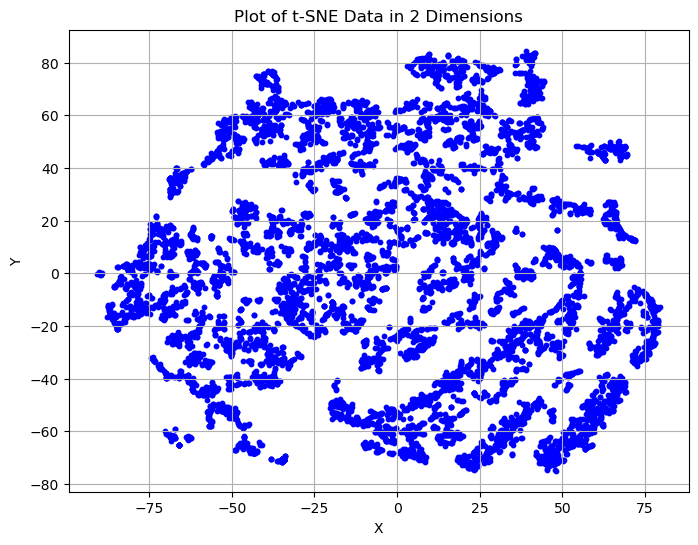

In [18]:
scatter_plot_clustering(tsne_x_data, tsne_y_data, reduction_method)

In [19]:
X_tsne_reduced

array([[ -6.4032063 , -32.63254   ],
       [ 13.692307  ,   0.25838456],
       [-38.808353  ,   1.7265046 ],
       ...,
       [-58.68586   ,   4.051658  ],
       [-54.011246  ,  44.54396   ],
       [ 10.855373  ,  40.157578  ]], dtype=float32)

In [20]:
pd.DataFrame(X_tsne_reduced).to_csv("../Dataset/Dataset_for_reduced_data/LInterpolation_reduced.csv")

In [21]:
# Reduced to 2 dimensions using pca
X_pca_reduced, pca_x_data, pca_y_data, reduction_method = dimensionality_reduction(X, 'PCA', n_components=2)

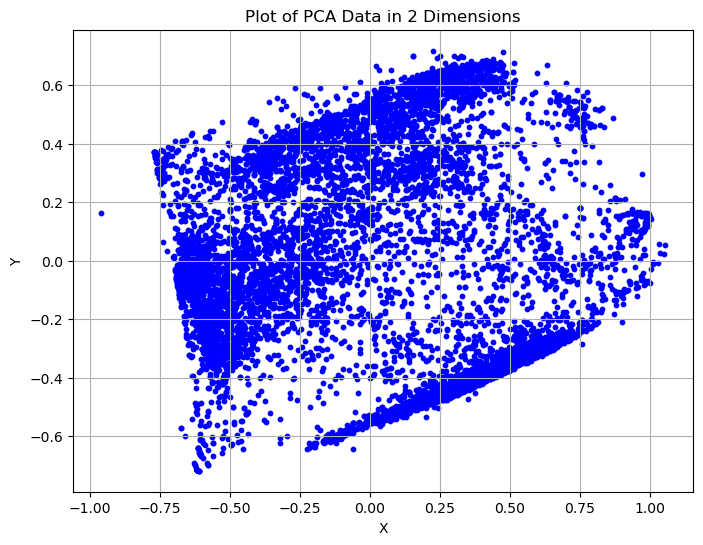

In [22]:
scatter_plot_clustering(pca_x_data, pca_y_data, reduction_method)

In [23]:
X_pca_reduced

array([[-0.2921863 , -0.23174741],
       [ 0.11703333,  0.07386361],
       [-0.49148298,  0.03115552],
       ...,
       [-0.58572897, -0.05451413],
       [-0.612599  ,  0.22727383],
       [ 0.06279215,  0.51269577]])

## K Means: Optimal number of clusters

#### Silhoutte Analysis

In [24]:
from clustering_function import plot_silhouette_analysis

For n_clusters = 2 The average silhouette_score is : 0.36512992
For n_clusters = 3 The average silhouette_score is : 0.429171
For n_clusters = 4 The average silhouette_score is : 0.38571584
For n_clusters = 5 The average silhouette_score is : 0.37082916
For n_clusters = 6 The average silhouette_score is : 0.4067849
For n_clusters = 7 The average silhouette_score is : 0.39905936


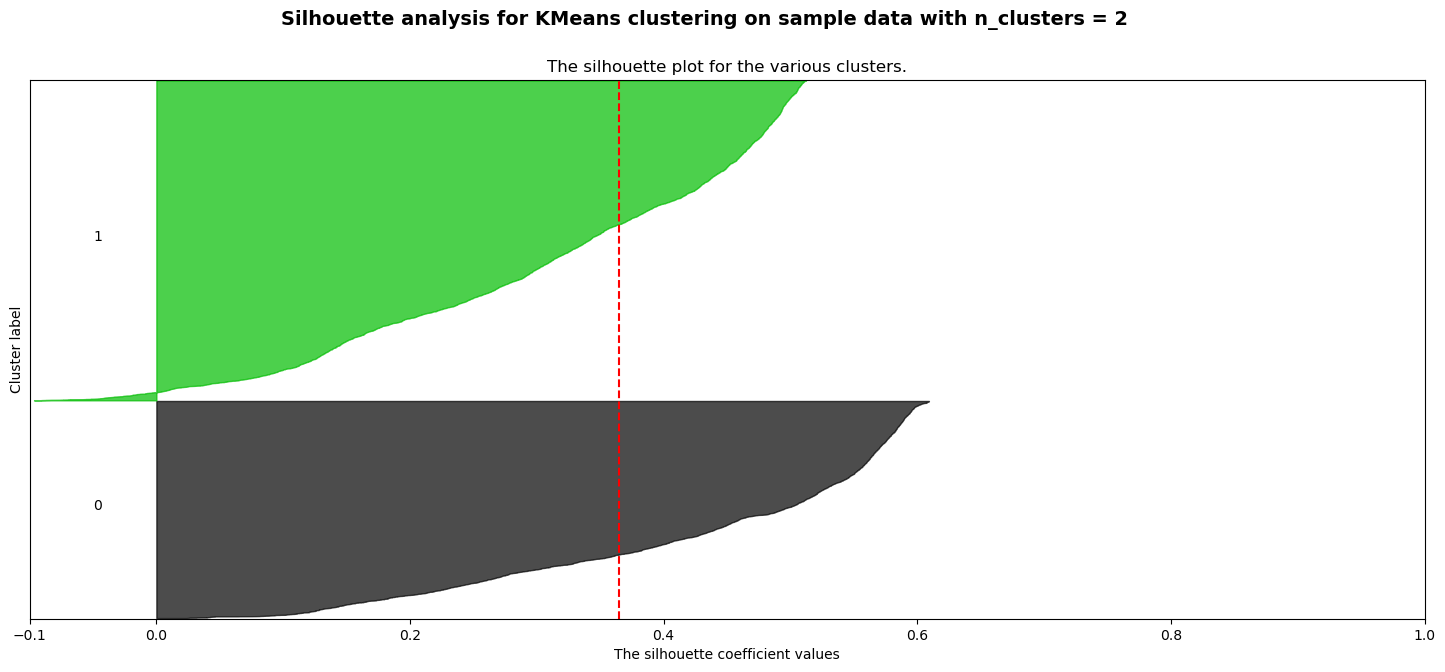

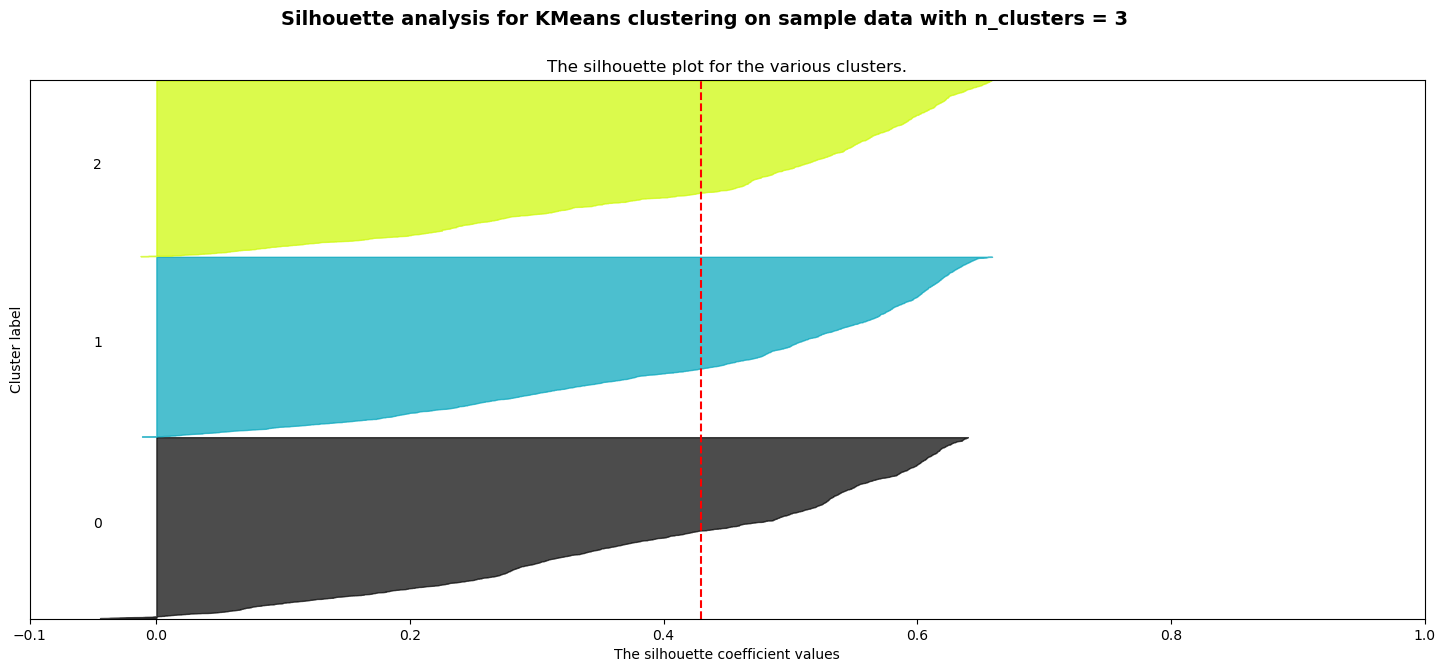

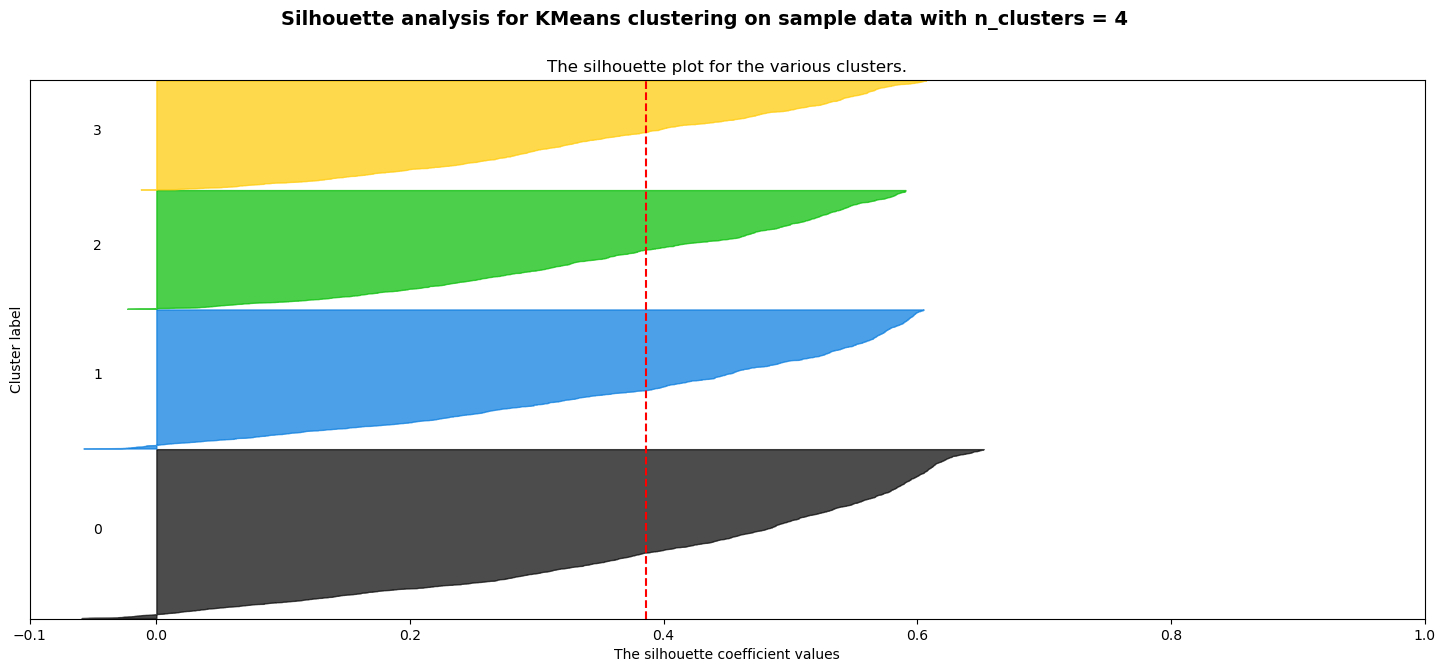

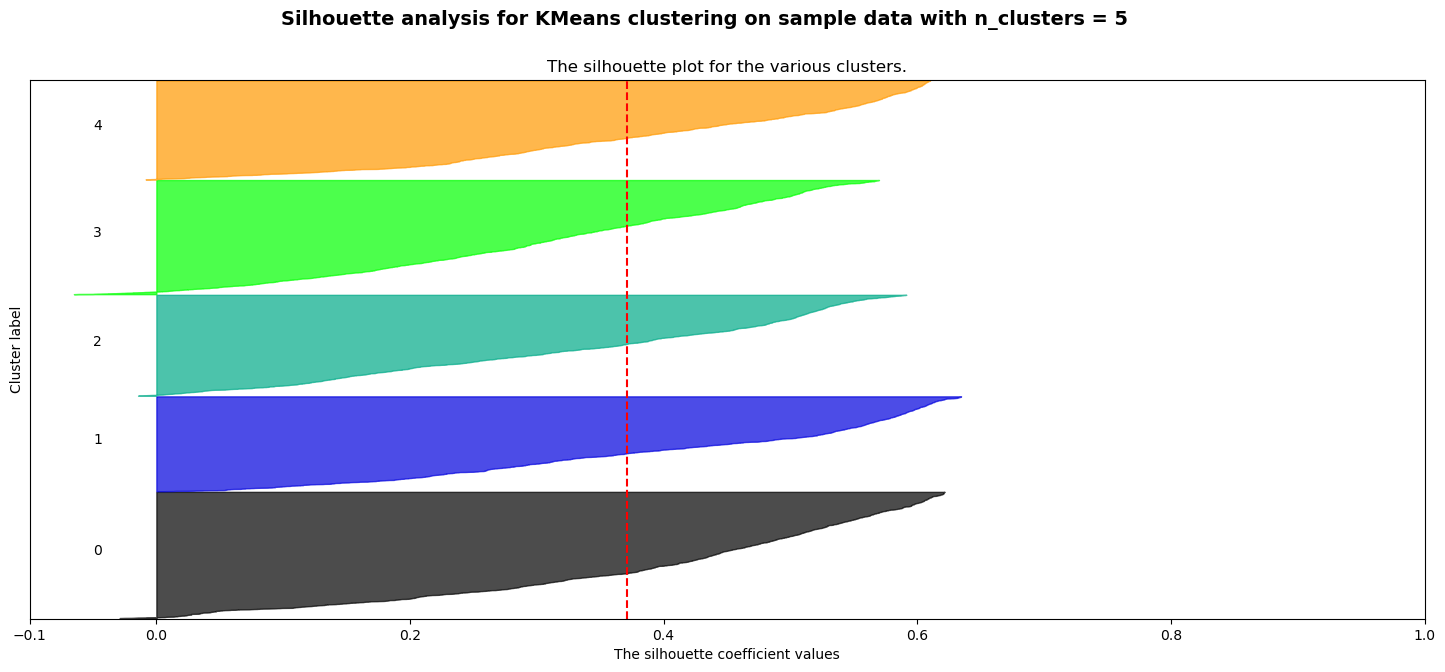

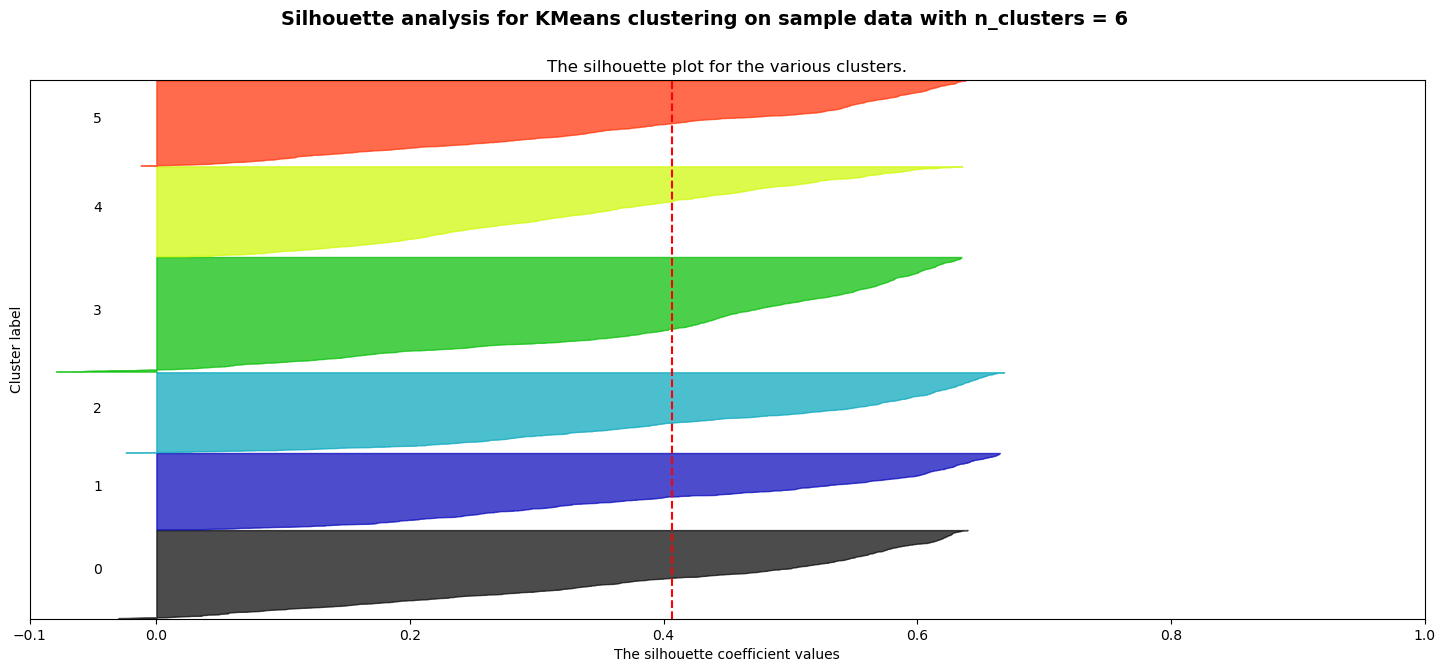

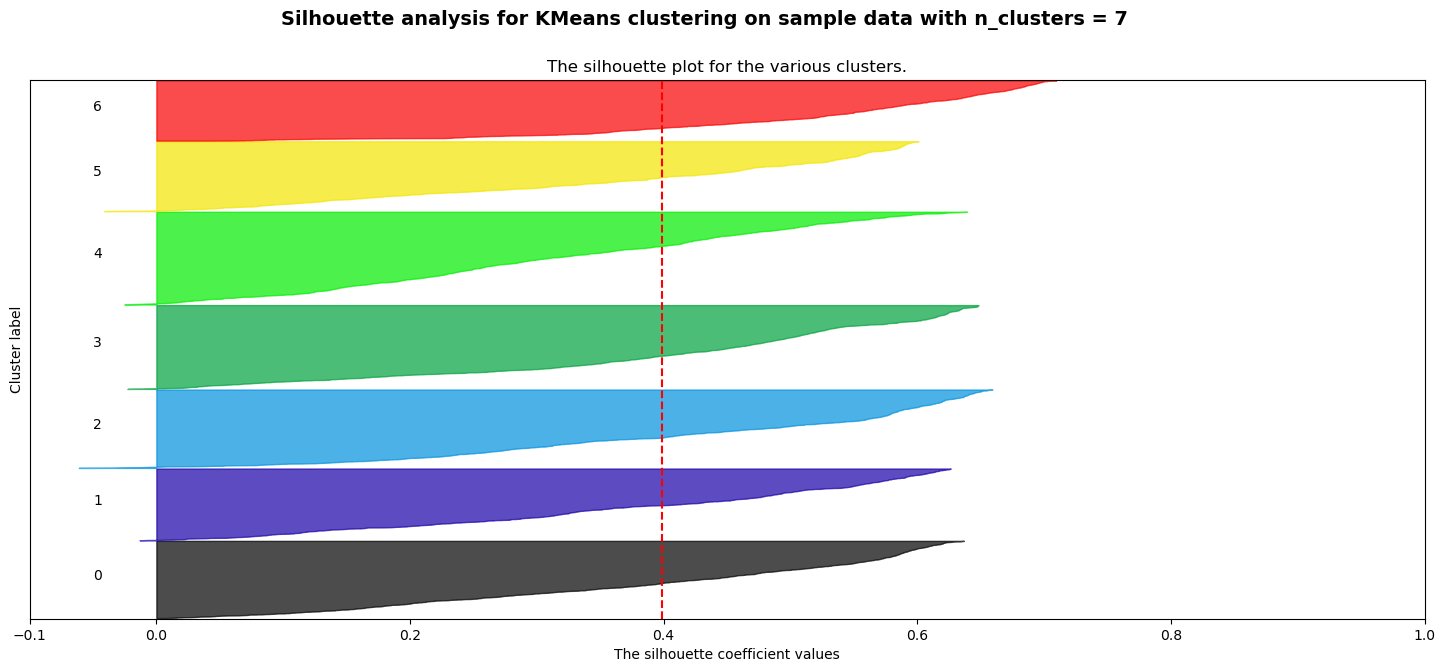

In [25]:
tsne_list_num_clusters = list(range(2,8))
plot_silhouette_analysis(X_tsne_reduced, tsne_list_num_clusters)

#### Elbow Method

In [26]:
from clustering_function import elbow_method_analysis

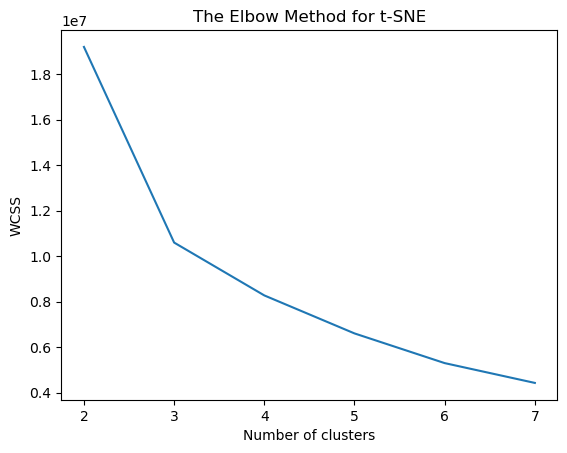

In [27]:
elbow_method_analysis(X_tsne_reduced)

## Clustering

In [28]:
# Trackers throughout each model
scores = {} # to track the silhoutte score of the tuned model
food_groups = {} # to track the counts of each group

In [29]:
X_with_labels = X.copy()
X_with_labels

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.198300                        0.146302   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  
0                     0.030388  
1                     0.212894  
2                     0.003042  
3                     0.014394  
4                     0.014394  
...                        ...  
8785                  0.129330  
8786                  0.129330  
8787                  0.000000  
8788                  0.009211  
8789                  0.275650  

[8790 rows x 7 columns]

## K Means Clustering

In [30]:
from clustering_function import perform_kmeans_clustering, plot_clusters

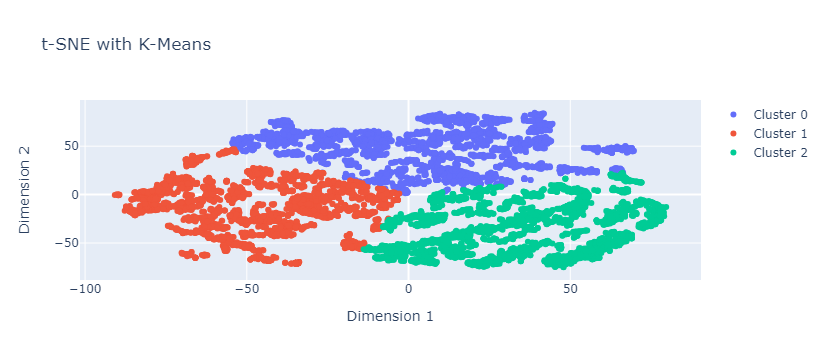

In [31]:
tsne_clust_labels, kmean_model = perform_kmeans_clustering(X_tsne_reduced, 3)
plot_clusters(X_tsne_reduced, tsne_clust_labels, 'K-Means')

In [32]:
# export model
with open('../Model_fitted/Kmeans_model_LInterpolation_pkl', 'wb') as files:
    pickle.dump(kmean_model, files)

In [33]:
X_with_labels['kmeans_tsne'] = tsne_clust_labels
scores['kmeans_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['kmeans_tsne']))

X_with_labels

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.198300                        0.146302   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  
0                     0.030388            2  
1                     0.212894            2  
2                     0.003042            1  
3                     0.014394            1  
4                     0.014394            1  
...                        ...          ...  
8785                  0.129330            1  
8786                  0.129330            1  
8787                  0.000000            1  
8788                  0.009211            1  
8789                  0.275650            0  

[8790 rows x 8 columns]

In [34]:
from clustering_function import get_food_groups, plot_cluster_distribution

In [35]:
food_groups, value_counts = get_food_groups(X_with_labels['kmeans_tsne'], 'KMeans_tsne',food_groups)

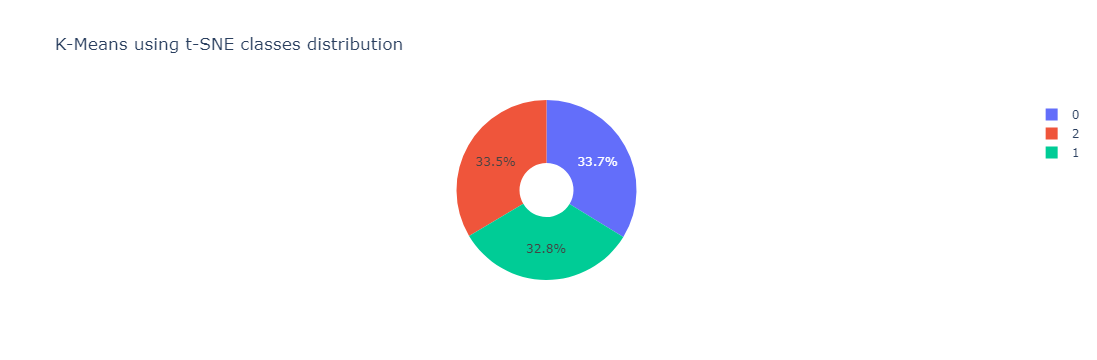

In [36]:
plot_cluster_distribution(value_counts, 'K-Means')

In [37]:
kmeans_tsne = X_with_labels.groupby('kmeans_tsne')

In [38]:
n = kmeans_tsne['kmeans_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(kmeans_tsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
10         0.857339         0.957418    0.221928        0.113698   
12         0.904365         0.529205    0.512571        0.822403   
...             ...              ...         ...             ...   
8701       0.834115         0.883149    0.529703        0.198541   
8733       0.822060         0.189696    0.614397        0.684976   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
10                          0.629536                        0.573440   
12                          0.632893                        0.671998   
...                              ...                             ...   
8701                        0.040132                        0.110093   
8733                        0.035562                        0.009622   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  
5                     0.348734            0  
7                     0.355775            0  
8                     0.308817            0  
10                    0.421040            0  
12                    0.494853            0  
...                        ...          ...  
8701                  0.051085            0  
8733                  0.478288            0  
8745                  0.063870            0  
8748                  0.000000            0  
8789                  0.275650            0  

[2964 rows x 8 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
9          0.721842         0.757620    0.153183        0.055176   
...             ...              ...         ...             ...   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.198300                        0.146302   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
9                           0.627839                        0.502008   
...                              ...                             ...   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  
2                     0.003042            1  
3                     0.014394            1  
4                     0.014394            1  
6                     0.180322            1  
9                     0.372046            1  
...                        ...          ...  
8784                  0.122689            1  
8785                  0.129330            1  
8786                  0.129330            1  
8787                  0.000000            1  
8788                  0.009211            1  

[2880 rows x 8 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
14         0.816493         0.139076    0.695060        0.644735   
100        0.786376         0.000000    0.756312        0.513785   
101        0.717455         0.000000    0.681411        0.382380   
...             ...              ...         ...             ...   
8747       0.767846         0.663975    0.715473        0.139076   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
14                          0.511857                        0.352783   
100                         0.351960                        0.293664   
101                         0.175770                        0.224155   
...                              ...                             ...   
8747                        0.000000                        0.000000   
8749                        0.178643                        0.174415   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  
0                     0.030388            2  
1                     0.212894            2  
14                    0.395637            2  
100                   0.254692            2  
101                   0.180514            2  
...                        ...          ...  
8747                  0.000000            2  
8749                  0.108235            2  
8750                  0.180322            2  
8771                  0.175470            2  
8773                  0.267429            2  

[2946 rows x 8 columns]

In [39]:
for i in range(0,n):
    display(kmeans_tsne.get_group(i).describe())

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2964.000000      2964.000000  2964.000000     2964.000000   
mean        0.859458         0.807531     0.460368        0.519641   
std         0.056624         0.182774     0.161004        0.205177   
min         0.647502         0.000000     0.000000        0.000000   
25%         0.825835         0.729323     0.383500        0.373287   
50%         0.868105         0.874901     0.477047        0.537341   
75%         0.900253         0.929333     0.558925        0.667188   
max         1.000000         0.988773     0.964519        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2964.000000                     2964.000000   
mean                         0.326583                        0.298494   
std                          0.192668                        0.195629   
min                          0.000000                        0.000000   
25%                          0.184851                        0.149593   
50%                          0.322182                        0.258963   
75%                          0.445526                        0.415599   
max                          0.884828                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               2964.000000       2964.0  
mean                   0.298887          0.0  
std                    0.178627          0.0  
min                    0.000000          0.0  
25%                    0.140432          0.0  
50%                    0.300113          0.0  
75%                    0.424674          0.0  
max                    0.903884          0.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2880.000000      2880.000000  2880.000000     2880.000000   
mean        0.588276         0.500386     0.226006        0.103458   
std         0.135253         0.204311     0.162592        0.103350   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.526545         0.393058     0.102879        0.020652   
50%         0.604032         0.515598     0.213558        0.065026   
75%         0.665998         0.628707     0.317864        0.160762   
max         0.881090         1.000000     0.993116        0.452995   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2880.000000                     2880.000000   
mean                         0.053117                        0.052589   
std                          0.088529                        0.080519   
min                          0.000000                        0.000000   
25%                          0.002018                        0.007506   
50%                          0.010777                        0.024749   
75%                          0.076282                        0.062423   
max                          0.807477                        0.877362   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               2880.000000       2880.0  
mean                   0.050319          1.0  
std                    0.082288          0.0  
min                    0.000000          1.0  
25%                    0.003257          1.0  
50%                    0.013984          1.0  
75%                    0.061570          1.0  
max                    0.826135          1.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2946.000000      2946.000000  2946.000000     2946.000000   
mean        0.780898         0.080058     0.675652        0.520937   
std         0.067183         0.153483     0.130548        0.171363   
min         0.606421         0.000000     0.000000        0.000000   
25%         0.734266         0.000000     0.660549        0.398809   
50%         0.774789         0.000000     0.699237        0.505747   
75%         0.814782         0.075597     0.740815        0.629568   
max         1.000000         0.751628     1.000000        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2946.000000                     2946.000000   
mean                         0.363403                        0.175415   
std                          0.167177                        0.128341   
min                          0.000000                        0.000000   
25%                          0.244506                        0.082887   
50%                          0.351203                        0.134593   
75%                          0.468154                        0.233097   
max                          1.000000                        0.834938   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               2946.000000       2946.0  
mean                   0.331807          2.0  
std                    0.165276          0.0  
min                    0.000000          2.0  
25%                    0.209141          2.0  
50%                    0.308390          2.0  
75%                    0.432153          2.0  
max                    1.000000          2.0

### Insights

- Cluster 0 contains the highest mean of energy values following with the highest values of carbohydrates. 
- Cluster 1 shows the lowest mean of the fat as well as the fatty acid, but moderate values for other nutrition.
- Cluster 2 has the high value of energy values and highest values of the protein, show that it is a good suggested food group for fitness people.

## Agglomerative Clustering

In [40]:
from clustering_function import tuning_agglomerative, perform_agg_clustering

In [41]:
agg_param_grid = {
      'n_clusters': [2, 3, 4, 5, 6],
      'linkage': ['ward'],
      'affinity' : ['euclidean']
  }

In [42]:
tuning_agglomerative(X_tsne_reduced, agg_param_grid)

Best silhouette score: 0.37387103
Best parameters: {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 3}


In [43]:
Agg_tsne_clust_labels,agg_model = perform_agg_clustering(X_tsne_reduced, 3)

In [44]:
# export model
with open('../Model_fitted/Agg_model_LInterpolation_pkl', 'wb') as files:
    pickle.dump(agg_model, files)

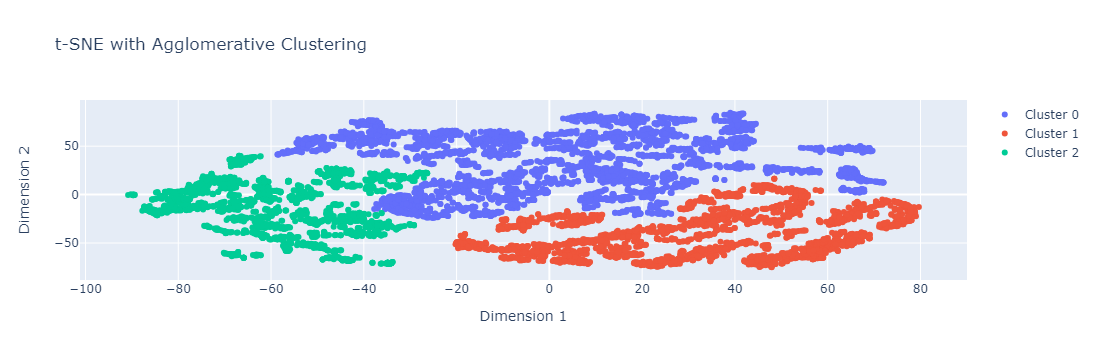

In [45]:
plot_clusters(X_tsne_reduced, Agg_tsne_clust_labels, "Agglomerative Clustering")

In [46]:
X_with_labels['Agg_tsne'] = Agg_tsne_clust_labels
scores['Agg_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Agg_tsne']))

In [47]:
food_groups, value_counts = get_food_groups(X_with_labels['Agg_tsne'], 'Agglomerative_tsne',food_groups)

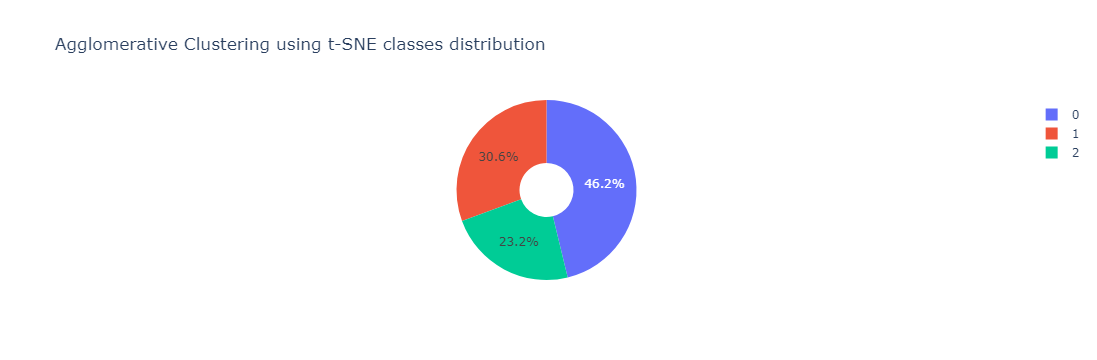

In [48]:
plot_cluster_distribution(value_counts, 'Agglomerative Clustering')

In [49]:
Aggtsne = X_with_labels.groupby('Agg_tsne')

In [50]:
n = Aggtsne['Agg_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(Aggtsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
1          0.770972         0.539328    0.673774        0.444529   
5          0.913731         0.870851    0.476131        0.745258   
6          0.670663         0.503637    0.457547        0.324453   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
...             ...              ...         ...             ...   
8777       0.670663         0.510318    0.504409        0.271448   
8779       0.611086         0.451652    0.407945        0.202832   
8781       0.606421         0.375597    0.333329        0.313517   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
1                           0.297219                        0.227549   
5                           0.676104                        0.443583   
6                           0.222082                        0.060118   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
...                              ...                             ...   
8777                        0.138099                        0.042725   
8779                        0.079945                        0.009954   
8781                        0.143763                        0.020346   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
1                     0.212894            2         0  
5                     0.348734            0         0  
6                     0.180322            1         0  
7                     0.355775            0         0  
8                     0.308817            0         0  
...                        ...          ...       ...  
8777                  0.197391            1         0  
8779                  0.151654            1         0  
8781                  0.247258            1         0  
8788                  0.009211            1         0  
8789                  0.275650            0         0  

[4062 rows x 9 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
14         0.816493         0.139076    0.695060        0.644735   
100        0.786376         0.000000    0.756312        0.513785   
101        0.717455         0.000000    0.681411        0.382380   
112        0.770972         0.000000    0.740576        0.500649   
...             ...              ...         ...             ...   
8747       0.767846         0.663975    0.715473        0.139076   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
14                          0.511857                        0.352783   
100                         0.351960                        0.293664   
101                         0.175770                        0.224155   
112                         0.377811                        0.098613   
...                              ...                             ...   
8747                        0.000000                        0.000000   
8749                        0.178643                        0.174415   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
0                     0.030388            2         1  
14                    0.395637            2         1  
100                   0.254692            2         1  
101                   0.180514            2         1  
112                   0.327957            2         1  
...                        ...          ...       ...  
8747                  0.000000            2         1  
8749                  0.108235            2         1  
8750                  0.180322            2         1  
8771                  0.175470            2         1  
8773                  0.267429            2         1  

[2690 rows x 9 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
15         0.836114         0.000000    0.000000        0.000000   
16         0.499756         0.210347    0.047885        0.000000   
...             ...              ...         ...             ...   
8783       0.556031         0.463708    0.351950        0.035864   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.198300                        0.146302   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
15                          0.000000                        0.000000   
16                          0.000000                        0.000000   
...                              ...                             ...   
8783                        0.010777                        0.001153   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
2                     0.003042            1         2  
3                     0.014394            1         2  
4                     0.014394            1         2  
15                    0.000000            1         2  
16                    0.000000            1         2  
...                        ...          ...       ...  
8783                  0.024012            1         2  
8784                  0.122689            1         2  
8785                  0.129330            1         2  
8786                  0.129330            1         2  
8787                  0.000000            1         2  

[2038 rows x 9 columns]

In [51]:
for i in range(0,n):
    display(Aggtsne.get_group(i).describe())

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    4062.000000      4062.000000  4062.000000     4062.000000   
mean        0.815532         0.705362     0.431214        0.481461   
std         0.111206         0.252713     0.179526        0.228662   
min         0.203695         0.000000     0.000000        0.000000   
25%         0.765657         0.543293     0.321701        0.310953   
50%         0.852091         0.789609     0.451480        0.488263   
75%         0.889868         0.914597     0.555005        0.642177   
max         1.000000         0.988773     0.964519        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     4062.000000                     4062.000000   
mean                         0.308808                        0.271901   
std                          0.204526                        0.195347   
min                          0.000000                        0.000000   
25%                          0.144298                        0.121303   
50%                          0.287844                        0.233463   
75%                          0.431515                        0.381126   
max                          1.000000                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               4062.000000  4062.000000    4062.0  
mean                   0.282536     0.365830       0.0  
std                    0.191412     0.650115       0.0  
min                    0.000000     0.000000       0.0  
25%                    0.127597     0.000000       0.0  
50%                    0.261616     0.000000       0.0  
75%                    0.404692     1.000000       0.0  
max                    1.000000     2.000000       0.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2690.000000      2690.000000  2690.000000     2690.000000   
mean        0.767226         0.051861     0.698852        0.484154   
std         0.060252         0.113644     0.067349        0.167031   
min         0.509238         0.000000     0.142881        0.000000   
25%         0.726101         0.000000     0.669471        0.371344   
50%         0.768634         0.000000     0.703998        0.484011   
75%         0.806518         0.014660     0.743178        0.610040   
max         0.991285         0.663975     1.000000        0.986730   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2690.000000                     2690.000000   
mean                         0.334166                        0.145335   
std                          0.157733                        0.098977   
min                          0.000000                        0.000000   
25%                          0.224111                        0.074457   
50%                          0.331403                        0.116814   
75%                          0.453226                        0.188772   
max                          0.923391                        0.752178   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               2690.000000  2690.000000    2690.0  
mean                   0.307048     1.951301       1.0  
std                    0.151702     0.215278       0.0  
min                    0.000000     1.000000       1.0  
25%                    0.195071     2.000000       1.0  
50%                    0.295910     2.000000       1.0  
75%                    0.417539     2.000000       1.0  
max                    0.759525     2.000000       1.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2038.000000      2038.000000  2038.000000     2038.000000   
mean        0.571965         0.522963     0.183709        0.056323   
std         0.150741         0.200265     0.144135        0.057196   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.499756         0.400521     0.066805        0.018673   
50%         0.580577         0.545532     0.158707        0.039505   
75%         0.664410         0.653907     0.278874        0.080135   
max         0.881090         1.000000     0.607239        0.329720   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2038.000000                     2038.000000   
mean                         0.018779                        0.028240   
std                          0.037923                        0.039709   
min                          0.000000                        0.000000   
25%                          0.001124                        0.004124   
50%                          0.004461                        0.015208   
75%                          0.015452                        0.036887   
max                          0.355877                        0.372690   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               2038.000000  2038.000000    2038.0  
mean                   0.017028     0.999509       2.0  
std                    0.029510     0.022151       0.0  
min                    0.000000     0.000000       2.0  
25%                    0.001743     1.000000       2.0  
50%                    0.007315     1.000000       2.0  
75%                    0.018855     1.000000       2.0  
max                    0.346579     1.000000       2.0

### Insights

- Cluster 0 has the highest value of energy values and highest values of the carbohydrates, which may be needed for athletes.
- Cluster 1 contains the high mean of energy values,highest values of protein and lowest values of carbohydrate, providing a good suggestion for fitness people. 
- Cluster 2 shows the lowest mean of the fat as well as the fatty acid, but moderate values for other nutrition, considered a healthy food group.

## GMM

In [52]:
from clustering_function import gmm_bic_score, perform_gmm_clustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

In [53]:
gmm_param_grid = {
    "n_components": range(1, 6),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=gmm_param_grid, scoring=gmm_bic_score
)

In [54]:
grid_search.fit(X_tsne_reduced)
Gmm_tsne_results = grid_search.cv_results_

In [55]:
Gmm_tsne_df = pd.DataFrame(Gmm_tsne_results)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
Gmm_tsne_df["mean_test_score"] = -Gmm_tsne_df["mean_test_score"]
Gmm_tsne_df = Gmm_tsne_df.rename(
    columns={
        "param_n_components": "Number of Components",
        "param_covariance_type": "Type of Covariance",
        "mean_test_score": "BIC Score",
    }
)
Gmm_tsne_df.sort_values(by="BIC Score").head()

Number of Components Type of Covariance     BIC Score
12                    3               diag  36357.688071
2                     3          spherical  36361.465628
9                     5               tied  36376.931222
7                     3               tied  36378.041539
13                    4               diag  36407.241548

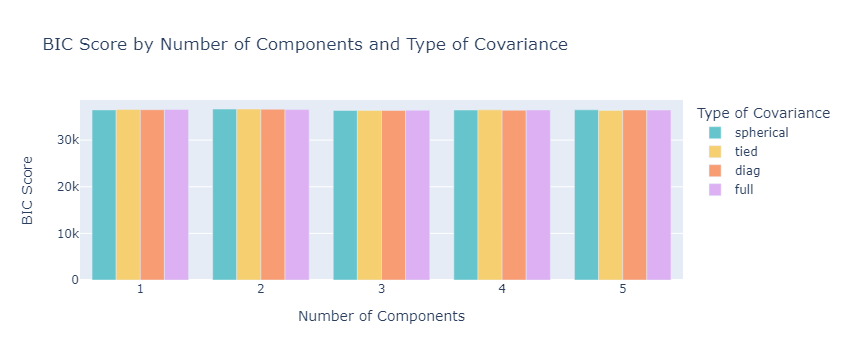

In [56]:
fig = px.bar(Gmm_tsne_df, x="Number of Components", y="BIC Score",
                 color="Type of Covariance", barmode="group",
                 title="BIC Score by Number of Components and Type of Covariance",
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [57]:
Gmm_tsne_labels,gmm_model = perform_gmm_clustering(X_tsne_reduced, 5, 'tied')

In [58]:
# export model
with open('../Model_fitted/Gmm_model_LInterpolation_pkl', 'wb') as files:
    pickle.dump(gmm_model, files)

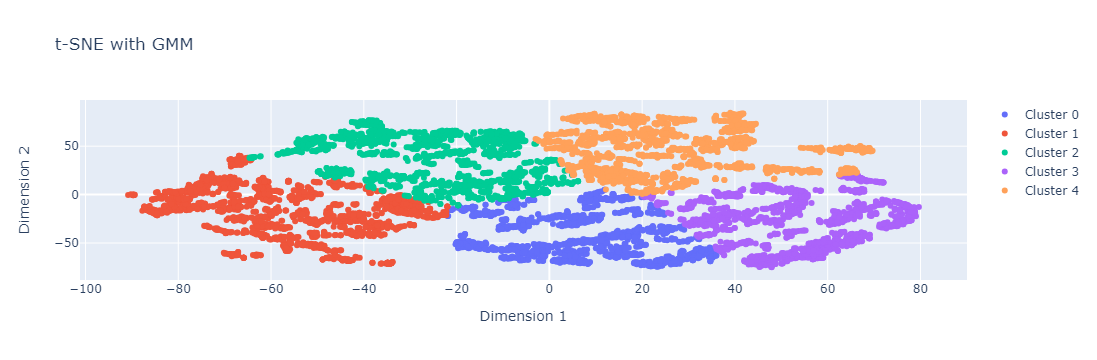

In [59]:
plot_clusters(X_tsne_reduced, Gmm_tsne_labels, "GMM")

In [60]:
X_with_labels['Gmm_tsne'] = Gmm_tsne_labels
scores['Gmm_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Gmm_tsne']))

In [61]:
food_groups, value_counts = get_food_groups(X_with_labels['Gmm_tsne'], 'GMM_tsne',food_groups)

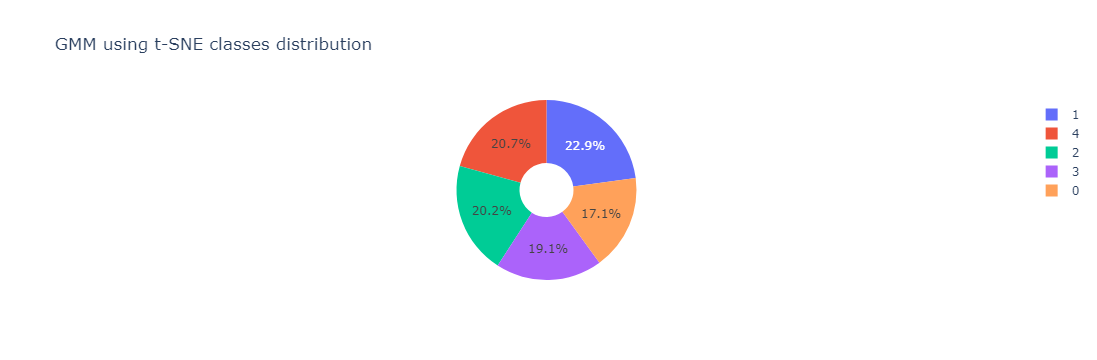

In [62]:
plot_cluster_distribution(value_counts, 'GMM')

In [63]:
GmmTsne = X_with_labels.groupby('Gmm_tsne')

In [64]:
n = GmmTsne['Gmm_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(GmmTsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
9          0.721842         0.757620    0.153183        0.055176   
11         0.622139         0.616810    0.093208        0.030283   
95         0.681005         0.645728    0.349185        0.205366   
...             ...              ...         ...             ...   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8773       0.673693         0.347863    0.512571        0.388237   
8781       0.606421         0.375597    0.333329        0.313517   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
9                           0.627839                        0.502008   
11                          0.631221                        0.627932   
95                          0.666130                        0.511723   
...                              ...                             ...   
8749                        0.178643                        0.174415   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8773                        0.257480                        0.088905   
8781                        0.143763                        0.020346   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
0                     0.030388            2         1         0  
1                     0.212894            2         0         0  
9                     0.372046            1         0         0  
11                    0.461044            1         0         0  
95                    0.294006            1         0         0  
...                        ...          ...       ...       ...  
8749                  0.108235            2         1         0  
8750                  0.180322            2         1         0  
8771                  0.175470            2         1         0  
8773                  0.267429            2         1         0  
8781                  0.247258            1         0         0  

[1505 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
15         0.836114         0.000000    0.000000        0.000000   
16         0.499756         0.210347    0.047885        0.000000   
...             ...              ...         ...             ...   
8779       0.611086         0.451652    0.407945        0.202832   
8780       0.594066         0.468248    0.424417        0.035864   
8782       0.556031         0.463708    0.351950        0.035864   
8783       0.556031         0.463708    0.351950        0.035864   
8787       0.642026         0.626764    0.305234        0.000000   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.198300                        0.146302   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
15                          0.000000                        0.000000   
16                          0.000000                        0.000000   
...                              ...                             ...   
8779                        0.079945                        0.009954   
8780                        0.010777                        0.001153   
8782                        0.010777                        0.001153   
8783                        0.010777                        0.001153   
8787                        0.000000                        0.000000   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
2                     0.003042            1         2         1  
3                     0.014394            1         2         1  
4                     0.014394            1         2         1  
15                    0.000000            1         2         1  
16                    0.000000            1         2         1  
...                        ...          ...       ...       ...  
8779                  0.151654            1         0         1  
8780                  0.024012            1         2         1  
8782                  0.024012            1         2         1  
8783                  0.024012            1         2         1  
8787                  0.000000            1         2         1  

[2010 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
6          0.670663         0.503637    0.457547        0.324453   
10         0.857339         0.957418    0.221928        0.113698   
34         0.851197         0.668777    0.297180        0.610040   
38         0.804069         0.726613    0.104626        0.466242   
96         0.869694         0.908630    0.596203        0.451112   
...             ...              ...         ...             ...   
8777       0.670663         0.510318    0.504409        0.271448   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8788       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
6                           0.222082                        0.060118   
10                          0.629536                        0.573440   
34                          0.382313                        0.118413   
38                          0.082458                        0.029681   
96                          0.222501                        0.307274   
...                              ...                             ...   
8777                        0.138099                        0.042725   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8788                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
6                     0.180322            1         0         2  
10                    0.421040            0         0         2  
34                    0.517850            0         0         2  
38                    0.442903            0         0         2  
96                    0.196858            0         0         2  
...                        ...          ...       ...       ...  
8777                  0.197391            1         0         2  
8784                  0.122689            1         2         2  
8785                  0.129330            1         2         2  
8786                  0.129330            1         2         2  
8788                  0.009211            1         0         2  

[1775 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
14         0.816493         0.139076    0.695060        0.644735   
100        0.786376         0.000000    0.756312        0.513785   
103        0.999184         0.000000    0.000000        0.998925   
112        0.770972         0.000000    0.740576        0.500649   
408        0.770197         0.198541    0.611561        0.592480   
...             ...              ...         ...             ...   
8713       0.812468         0.424712    0.672367        0.620179   
8717       0.808927         0.517595    0.662373        0.593883   
8721       0.818186         0.421638    0.673450        0.633388   
8722       0.792514         0.408888    0.617197        0.603454   
8723       0.812468         0.473672    0.661235        0.615169   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
14                          0.511857                        0.352783   
100                         0.351960                        0.293664   
103                         0.861886                        0.577201   
112                         0.377811                        0.098613   
408                         0.446801                        0.319664   
...                              ...                             ...   
8713                        0.444714                        0.489222   
8717                        0.338834                        0.522859   
8721                        0.384040                        0.515520   
8722                        0.371404                        0.522859   
8723                        0.358018                        0.529973   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
14                    0.395637            2         1         3  
100                   0.254692            2         1         3  
103                   0.807114            2         0         3  
112                   0.327957            2         1         3  
408                   0.356205            2         1         3  
...                        ...          ...       ...       ...  
8713                  0.292086            2         0         3  
8717                  0.261219            2         0         3  
8721                  0.324161            2         0         3  
8722                  0.294946            2         0         3  
8723                  0.261219            2         0         3  

[1682 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
12         0.904365         0.529205    0.512571        0.822403   
13         0.862406         0.577933    0.329815        0.756303   
...             ...              ...         ...             ...   
8636       0.994698         0.000000    0.074901        0.992358   
8659       0.882545         0.914725    0.526799        0.531641   
8696       0.883985         0.813507    0.761901        0.617939   
8725       0.859472         0.591069    0.577721        0.718901   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
12                          0.632893                        0.671998   
13                          0.615989                        0.517992   
...                              ...                             ...   
8636                        0.615675                        0.417687   
8659                        0.385713                        0.213847   
8696                        0.438754                        0.386834   
8725                        0.444714                        0.657667   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
5                     0.348734            0         0         4  
7                     0.355775            0         0         4  
8                     0.308817            0         0         4  
12                    0.494853            0         0         4  
13                    0.473315            0         0         4  
...                        ...          ...       ...       ...  
8636                  0.333649            0         0         4  
8659                  0.356463            0         0         4  
8696                  0.261418            0         0         4  
8725                  0.360711            2         0         4  
8789                  0.275650            0         0         4  

[1818 rows x 10 columns]

In [65]:
for i in range(0,n):
    display(GmmTsne.get_group(i).describe())

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    1505.000000      1505.000000  1505.000000     1505.000000   
mean        0.704221         0.136977     0.634000        0.337198   
std         0.066995         0.195279     0.161090        0.127186   
min         0.203695         0.000000     0.000000        0.000000   
25%         0.686603         0.000000     0.634587        0.271448   
50%         0.716338         0.000000     0.687378        0.354715   
75%         0.742001         0.294895     0.713224        0.423180   
max         0.991285         0.757620     1.000000        0.986730   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     1505.000000                     1505.000000   
mean                         0.208543                        0.141111   
std                          0.106104                        0.109736   
min                          0.000000                        0.000000   
25%                          0.142690                        0.061362   
50%                          0.214821                        0.108652   
75%                          0.270866                        0.201838   
max                          0.807477                        0.877362   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               1505.000000  1505.000000  1505.000000    1505.0  
mean                   0.179769     1.798007     0.773422       0.0  
std                    0.092821     0.409815     0.418756       0.0  
min                    0.000000     0.000000     0.000000       0.0  
25%                    0.124925     2.000000     1.000000       0.0  
50%                    0.182898     2.000000     1.000000       0.0  
75%                    0.232873     2.000000     1.000000       0.0  
max                    0.826135     2.000000     1.000000       0.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2010.000000      2010.000000  2010.000000     2010.000000   
mean        0.556407         0.495786     0.164237        0.059145   
std         0.142860         0.192121     0.117554        0.061677   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.499756         0.387875     0.066805        0.016676   
50%         0.568816         0.503213     0.154299        0.039505   
75%         0.629913         0.604787     0.251858        0.081999   
max         0.880357         1.000000     0.583785        0.331135   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2010.000000                     2010.000000   
mean                         0.022265                        0.029160   
std                          0.040610                        0.044440   
min                          0.000000                        0.000000   
25%                          0.000899                        0.003669   
50%                          0.004682                        0.014341   
75%                          0.019981                        0.035900   
max                          0.355877                        0.372690   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               2010.000000       2010.0  2010.000000    2010.0  
mean                   0.019288          1.0     1.790050       1.0  
std                    0.032243          0.0     0.613195       0.0  
min                    0.000000          1.0     0.000000       1.0  
25%                    0.001526          1.0     2.000000       1.0  
50%                    0.007104          1.0     2.000000       1.0  
75%                    0.019623          1.0     2.000000       1.0  
max                    0.317600          1.0     2.000000       1.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    1775.000000      1775.000000  1775.000000     1775.000000   
mean        0.784781         0.779813     0.430067        0.291962   
std         0.085526         0.170855     0.152128        0.133404   
min         0.556031         0.189696     0.000000        0.000000   
25%         0.707674         0.647972     0.331327        0.197673   
50%         0.814782         0.833044     0.448531        0.300381   
75%         0.864876         0.941732     0.519583        0.383490   
max         0.903426         0.996867     0.964519        0.774539   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     1775.000000                     1775.000000   
mean                         0.140813                        0.132900   
std                          0.102860                        0.092345   
min                          0.000000                        0.000000   
25%                          0.052028                        0.056706   
50%                          0.131662                        0.120618   
75%                          0.213316                        0.191640   
max                          0.629536                        0.573440   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               1775.000000  1775.000000  1775.000000    1775.0  
mean                   0.139394     0.324507     0.269296       2.0  
std                    0.115317     0.468322     0.682887       0.0  
min                    0.000000     0.000000     0.000000       2.0  
25%                    0.054181     0.000000     0.000000       2.0  
50%                    0.116097     0.000000     0.000000       2.0  
75%                    0.190631     1.000000     0.000000       2.0  
max                    0.756575     1.000000     2.000000       2.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    1682.000000      1682.000000  1682.000000     1682.000000   
mean        0.817116         0.051820     0.668451        0.619657   
std         0.057539         0.112279     0.158217        0.136636   
min         0.649283         0.000000     0.000000        0.072906   
25%         0.779242         0.000000     0.654777        0.522945   
50%         0.802829         0.000000     0.713586        0.600287   
75%         0.837964         0.018174     0.746160        0.687690   
max         1.000000         0.585474     0.948462        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     1682.000000                     1682.000000   
mean                         0.462800                        0.195958   
std                          0.133167                        0.137106   
min                          0.000000                        0.000000   
25%                          0.371437                        0.097250   
50%                          0.442671                        0.147160   
75%                          0.521584                        0.267222   
max                          1.000000                        0.834938   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               1682.000000       1682.0  1682.000000    1682.0  
mean                   0.432597          2.0     0.905470       3.0  
std                    0.139814          0.0     0.292652       0.0  
min                    0.149013          2.0     0.000000       3.0  
25%                    0.328470          2.0     1.000000       3.0  
50%                    0.404614          2.0     1.000000       3.0  
75%                    0.509400          2.0     1.000000       3.0  
max                    1.000000          2.0     1.000000       3.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    1818.000000      1818.000000  1818.000000     1818.000000   
mean        0.878211         0.768139     0.458696        0.652364   
std         0.050977         0.207176     0.168858        0.125668   
min         0.712934         0.000000     0.000000        0.395342   
25%         0.838575         0.687373     0.379489        0.555771   
50%         0.889092         0.851732     0.473891        0.636855   
75%         0.912850         0.910096     0.573021        0.719744   
max         1.000000         0.982119     0.898049        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     1818.000000                     1818.000000   
mean                         0.442560                        0.394106   
std                          0.150897                        0.188382   
min                          0.000000                        0.000000   
25%                          0.343785                        0.259753   
50%                          0.421673                        0.368671   
75%                          0.520681                        0.503688   
max                          0.926084                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne    Agg_tsne  Gmm_tsne  
count               1818.000000  1818.000000  1818.00000    1818.0  
mean                   0.398213     0.063806     0.00165       4.0  
std                    0.133687     0.351581     0.04060       0.0  
min                    0.000000     0.000000     0.00000       4.0  
25%                    0.307601     0.000000     0.00000       4.0  
50%                    0.385168     0.000000     0.00000       4.0  
75%                    0.486307     0.000000     0.00000       4.0  
max                    0.903884     2.000000     1.00000       4.0

### Insights

- Cluster 0 has similar nutritional values as cluster 4, which is high energy and protein but low carbohydrate. However, it has a quite low fat compared to cluster 4. Thus, this food group may be acceptable for the fitness people.
- Cluster 1 has the moderate values of energy and carbohydrate, but lower protein and fat values. So, it may be appropriate for those to keep their healthy lifestyle.
- Cluster 2 shows a highest values of carbohydrate and high energy, means that people who require high volume of energy will require the food group.
- Cluster 3 contains high energy, just a slightly lower comparted to the highest one, but it has highest values of protein and fat. This kind of food group may be suitable for those who are in fitness training.
- Cluster 4 has highest value of energy and high carbohydrate approximately similar to the cluster 2, as well as the highest values of fat. This indicates that the food group contains every nutrients that body need in a high amount.

## K-Medoids

In [66]:
from clustering_function import tuning_kmedoids, perform_kmd_clustering

In [67]:
kmd_param_grid = {
    'n_clusters': [3, 4],
    'method': ['alternate', 'pam'],
    'init' : ['random', 'heuristic', 'k-medoids++', 'build']
}

In [68]:
tuning_kmedoids(X_tsne_reduced, kmd_param_grid)

Best silhouette score: 0.42919084
Best parameters: {'init': 'build', 'method': 'alternate', 'n_clusters': 3}


In [69]:
Kmd_tsne_labels,kmd_model = perform_kmd_clustering(X_tsne_reduced, 3, 'k-medoids++', 'alternate')

In [70]:
# export model
with open('../Model_fitted/Kmd_model_LInterpolation_pkl', 'wb') as files:
    pickle.dump(kmd_model, files)

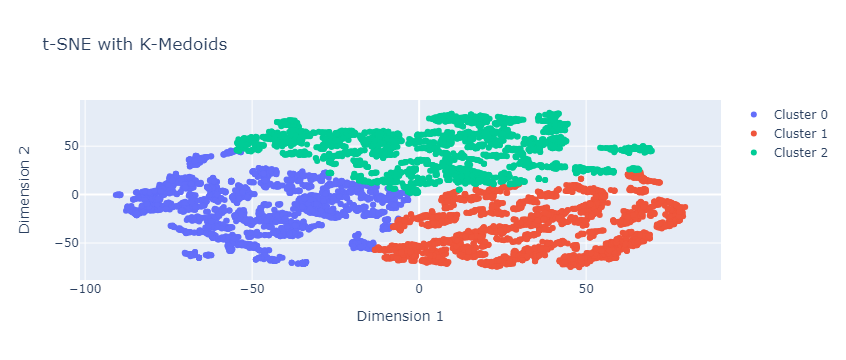

In [71]:
plot_clusters(X_tsne_reduced, Kmd_tsne_labels, "K-Medoids")

In [72]:
X_with_labels['Kmd_tsne'] = Kmd_tsne_labels
scores['Kmd_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Kmd_tsne']))

In [73]:
food_groups, value_counts = get_food_groups(X_with_labels['Kmd_tsne'], 'KMedoids_tsne',food_groups)

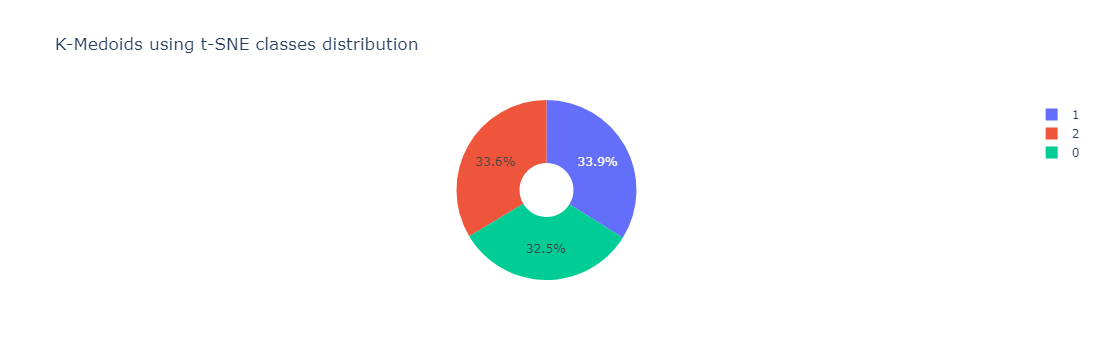

In [74]:
plot_cluster_distribution(value_counts, 'K-Medoids')

In [75]:
Kmdtsne = X_with_labels.groupby('Kmd_tsne')

In [76]:
n = Kmdtsne['Kmd_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(Kmdtsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
9          0.721842         0.757620    0.153183        0.055176   
...             ...              ...         ...             ...   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.198300                        0.146302   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
9                           0.627839                        0.502008   
...                              ...                             ...   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
2                     0.003042            1         2         1         0  
3                     0.014394            1         2         1         0  
4                     0.014394            1         2         1         0  
6                     0.180322            1         0         2         0  
9                     0.372046            1         0         0         0  
...                        ...          ...       ...       ...       ...  
8784                  0.122689            1         2         2         0  
8785                  0.129330            1         2         2         0  
8786                  0.129330            1         2         2         0  
8787                  0.000000            1         2         1         0  
8788                  0.009211            1         0         2         0  

[2860 rows x 11 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
14         0.816493         0.139076    0.695060        0.644735   
100        0.786376         0.000000    0.756312        0.513785   
101        0.717455         0.000000    0.681411        0.382380   
...             ...              ...         ...             ...   
8747       0.767846         0.663975    0.715473        0.139076   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
14                          0.511857                        0.352783   
100                         0.351960                        0.293664   
101                         0.175770                        0.224155   
...                              ...                             ...   
8747                        0.000000                        0.000000   
8749                        0.178643                        0.174415   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
0                     0.030388            2         1         0         1  
1                     0.212894            2         0         0         1  
14                    0.395637            2         1         3         1  
100                   0.254692            2         1         3         1  
101                   0.180514            2         1         0         1  
...                        ...          ...       ...       ...       ...  
8747                  0.000000            2         1         0         1  
8749                  0.108235            2         1         0         1  
8750                  0.180322            2         1         0         1  
8771                  0.175470            2         1         0         1  
8773                  0.267429            2         1         0         1  

[2979 rows x 11 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
10         0.857339         0.957418    0.221928        0.113698   
12         0.904365         0.529205    0.512571        0.822403   
...             ...              ...         ...             ...   
8701       0.834115         0.883149    0.529703        0.198541   
8733       0.822060         0.189696    0.614397        0.684976   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
10                          0.629536                        0.573440   
12                          0.632893                        0.671998   
...                              ...                             ...   
8701                        0.040132                        0.110093   
8733                        0.035562                        0.009622   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
5                     0.348734            0         0         4         2  
7                     0.355775            0         0         4         2  
8                     0.308817            0         0         4         2  
10                    0.421040            0         0         2         2  
12                    0.494853            0         0         4         2  
...                        ...          ...       ...       ...       ...  
8701                  0.051085            0         0         2         2  
8733                  0.478288            0         0         2         2  
8745                  0.063870            0         0         2         2  
8748                  0.000000            0         0         2         2  
8789                  0.275650            0         0         4         2  

[2951 rows x 11 columns]

In [77]:
for i in range(0,n):
    display(Kmdtsne.get_group(i).describe())

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2860.000000      2860.000000  2860.000000     2860.000000   
mean        0.587021         0.498230     0.224805        0.102628   
std         0.134785         0.203601     0.162407        0.102748   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.526545         0.391818     0.101826        0.020652   
50%         0.604032         0.513177     0.213558        0.065026   
75%         0.664410         0.627064     0.316794        0.158689   
max         0.881090         1.000000     0.993116        0.452995   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2860.000000                     2860.000000   
mean                         0.052673                        0.052366   
std                          0.088351                        0.080565   
min                          0.000000                        0.000000   
25%                          0.002018                        0.007366   
50%                          0.010562                        0.024541   
75%                          0.075799                        0.062103   
max                          0.807477                        0.877362   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne     Gmm_tsne  \
count               2860.000000  2860.000000  2860.000000  2860.000000   
mean                   0.050075     1.000699     1.465385     1.090210   
std                    0.082350     0.026440     0.858587     0.537742   
min                    0.000000     1.000000     0.000000     0.000000   
25%                    0.003257     1.000000     1.000000     1.000000   
50%                    0.013984     1.000000     2.000000     1.000000   
75%                    0.059079     1.000000     2.000000     1.000000   
max                    0.826135     2.000000     2.000000     2.000000   

       Kmd_tsne  
count    2860.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2979.000000      2979.000000  2979.000000     2979.000000   
mean        0.782613         0.082361     0.670724        0.524811   
std         0.069166         0.158073     0.141061        0.174769   
min         0.606421         0.000000     0.000000        0.000000   
25%         0.735256         0.000000     0.658015        0.400180   
50%         0.775541         0.000000     0.698466        0.508252   
75%         0.816493         0.079011     0.740296        0.633446   
max         1.000000         0.751628     1.000000        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2979.000000                     2979.000000   
mean                         0.366856                        0.181432   
std                          0.170420                        0.140526   
min                          0.000000                        0.000000   
25%                          0.245909                        0.083653   
50%                          0.352102                        0.136137   
75%                          0.470733                        0.240647   
max                          1.000000                        0.900156   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne     Gmm_tsne  \
count               2979.000000  2979.000000  2979.000000  2979.000000   
mean                   0.333756     1.976502     0.858342     1.814703   
std                    0.166252     0.215544     0.348758     1.507505   
min                    0.000000     0.000000     0.000000     0.000000   
25%                    0.209519     2.000000     1.000000     0.000000   
50%                    0.309403     2.000000     1.000000     3.000000   
75%                    0.434643     2.000000     1.000000     3.000000   
max                    1.000000     2.000000     1.000000     4.000000   

       Kmd_tsne  
count    2979.0  
mean        1.0  
std         0.0  
min         1.0  
25%         1.0  
50%         1.0  
75%         1.0  
max         1.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2951.000000      2951.000000  2951.000000     2951.000000   
mean        0.857984         0.813349     0.462511        0.513700   
std         0.056379         0.170838     0.156913        0.203473   
min         0.647502         0.000000     0.000000        0.000000   
25%         0.825301         0.733363     0.383500        0.367205   
50%         0.868105         0.876045     0.476916        0.533127   
75%         0.898964         0.929949     0.558654        0.663773   
max         0.999674         0.988773     0.964519        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2951.000000                     2951.000000   
mean                         0.321263                        0.292346   
std                          0.189497                        0.191154   
min                          0.000000                        0.000000   
25%                          0.178515                        0.147526   
50%                          0.317862                        0.253970   
75%                          0.441564                        0.409438   
max                          0.884828                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne   Agg_tsne     Gmm_tsne  Kmd_tsne  
count               2951.000000  2951.000000  2951.0000  2951.000000    2951.0  
mean                   0.295103     0.007455     0.0061     3.169773       2.0  
std                    0.177745     0.086035     0.1103     0.988398       0.0  
min                    0.000000     0.000000     0.0000     0.000000       2.0  
25%                    0.139045     0.000000     0.0000     2.000000       2.0  
50%                    0.297769     0.000000     0.0000     4.000000       2.0  
75%                    0.421422     0.000000     0.0000     4.000000       2.0  
max                    0.903884     1.000000     2.0000     4.000000       2.0

### Insights

- Cluster 0 has the moderate values of energy and carbohydrate but slightly lower values of protein and fat. This is suitable for normal person as a daily meal but they need to consume other proteins source.
- Cluster 1 contains high energy and highest protein as well as lipid but lowest values of carbohydrate.
- Cluster 2 shows highest energy and carbohydrate, as well as high lipid and protein. It is almost similar to cluster 1 except of the carbohydrate values.

In [78]:
scores

{'kmeans_tsne': 0.42919,
 'Agg_tsne': 0.37387103,
 'Gmm_tsne': 0.35802835,
 'Kmd_tsne': 0.42898467}

The K-Means model was shown to be the most effective one when the dataset's missing values were filled in using the linear interpolation approach.